# TASK - 3

# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the bank marketing dataset from the uci machine learning repository.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("C:\\Users\\Ash\\Downloads\\Compressed\\bank+marketing\\bank\\bank.csv", delimiter = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.shape

(4521, 17)

In [7]:
# Handling null values
df.dropna(inplace=True)

In [8]:
# Extract numerical and categorical columns
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


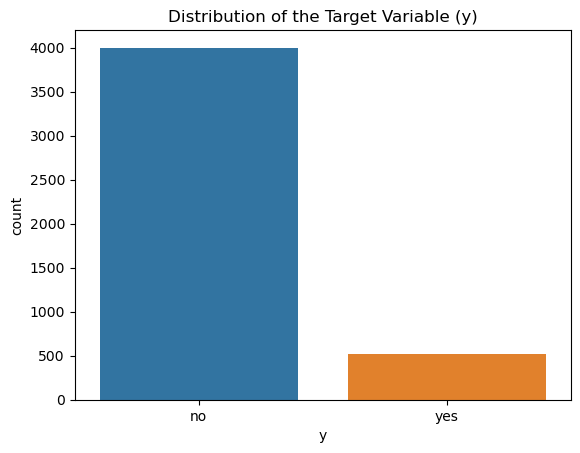

In [10]:
# Data Visualization- Visualize the distribution of the target variable 'y'
sns.countplot(x='y', data=df)
plt.title('Distribution of the Target Variable (y)')
plt.show()

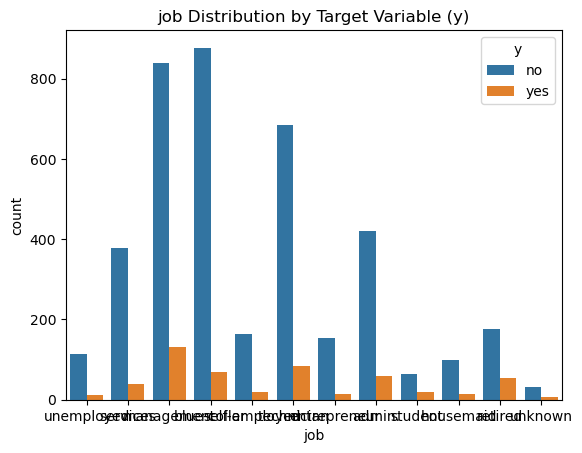

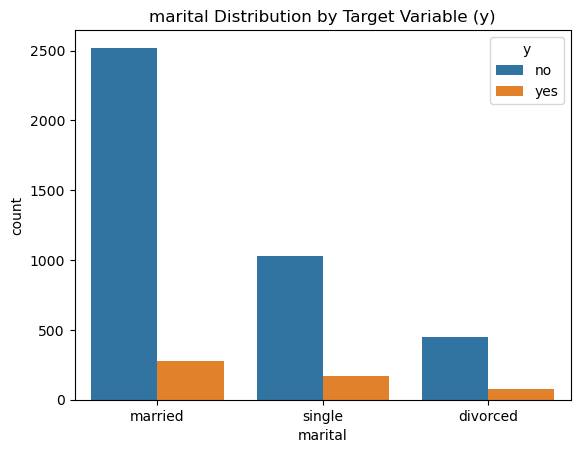

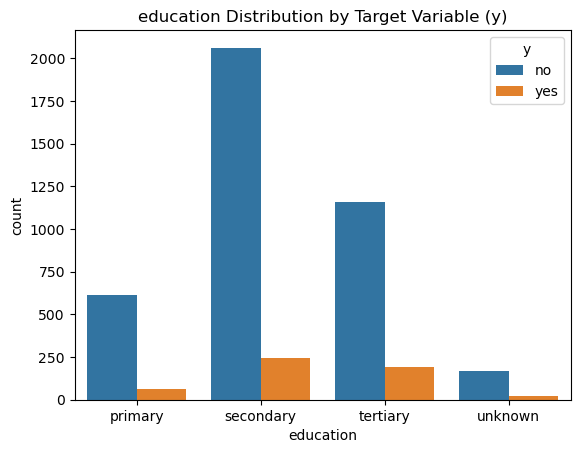

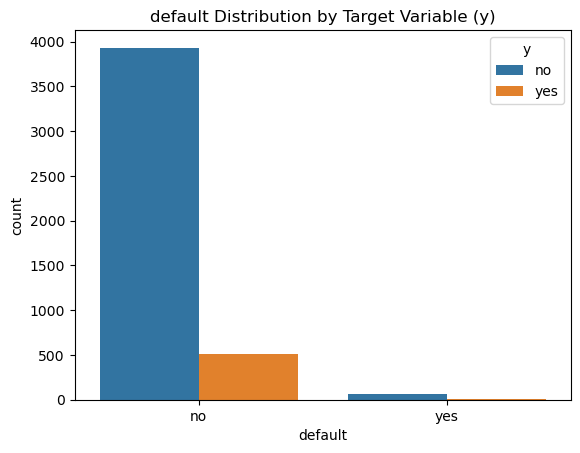

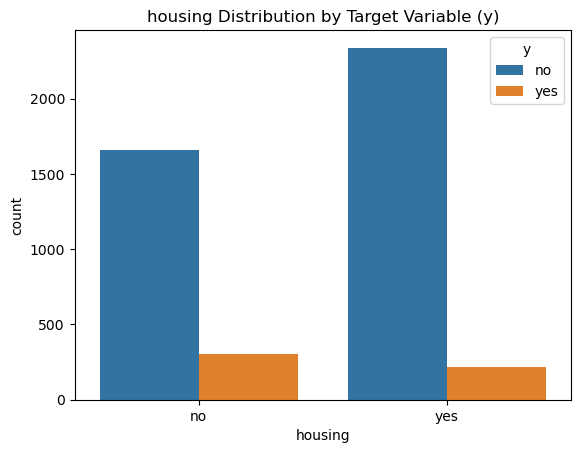

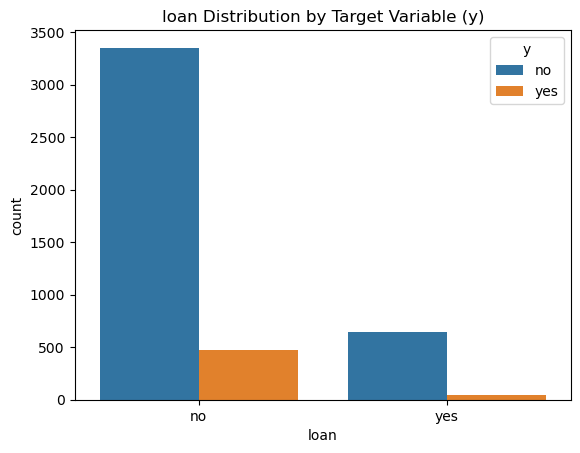

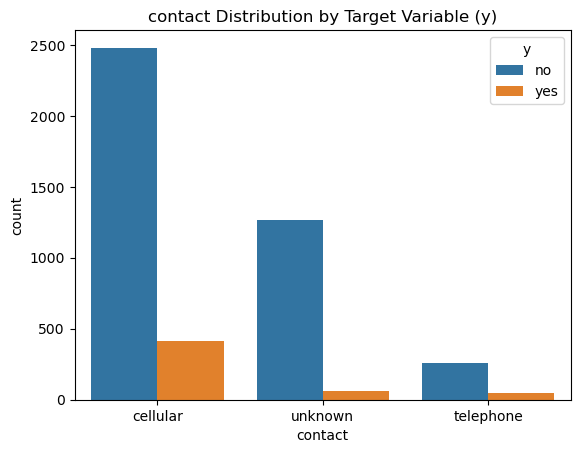

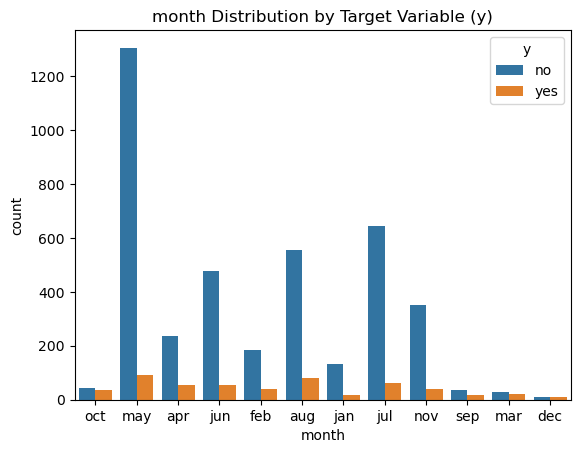

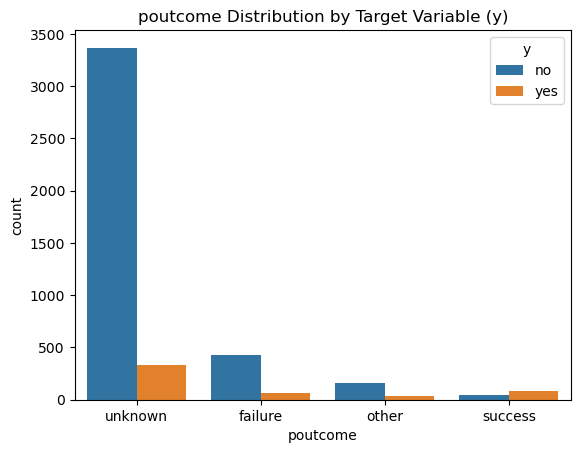

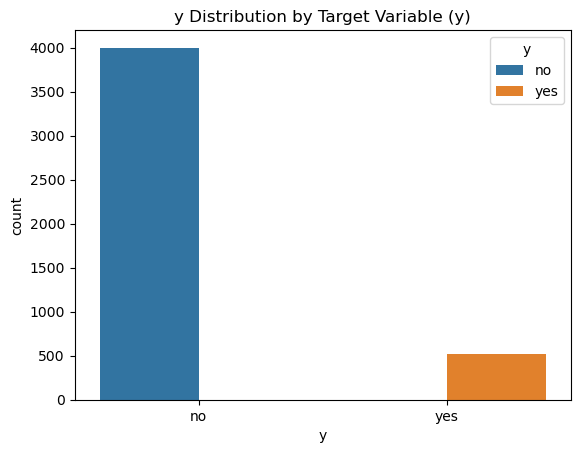

In [11]:
# Visualization of Categorical Columns using bar plots
for column in categorical_columns:
    sns.countplot(x=column, hue='y', data=df)
    plt.title(f'{column} Distribution by Target Variable (y)')
    plt.show()

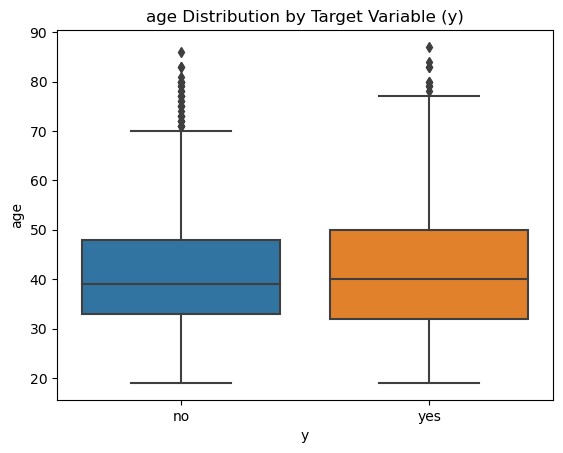

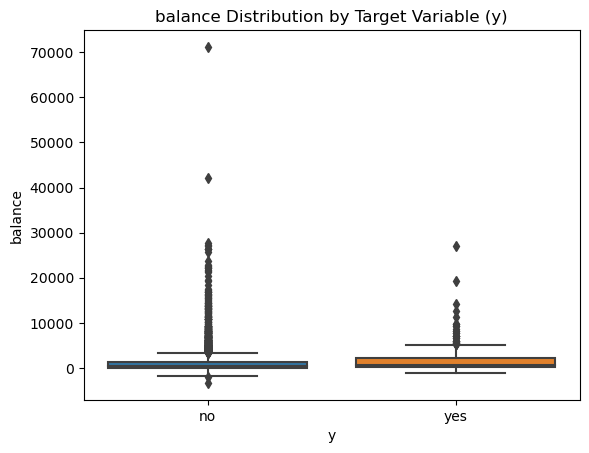

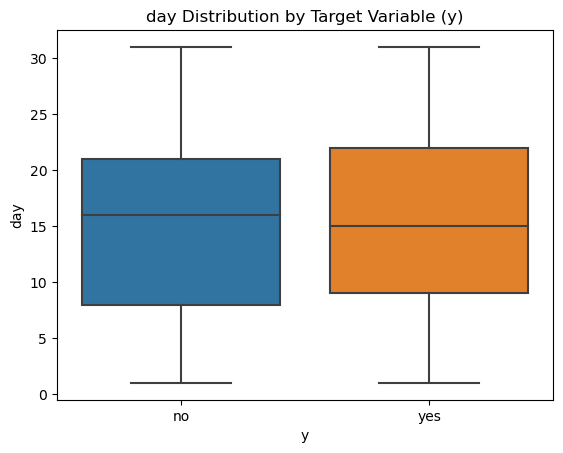

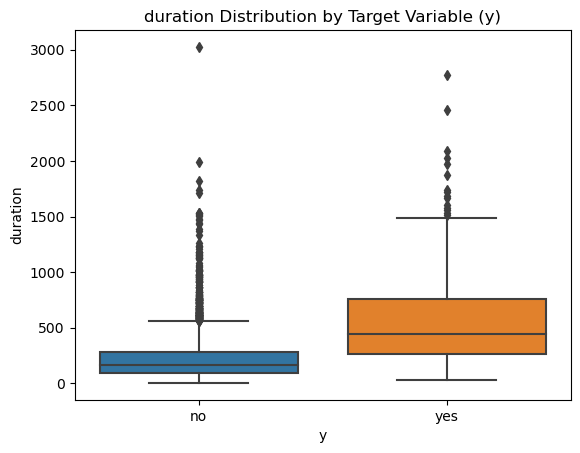

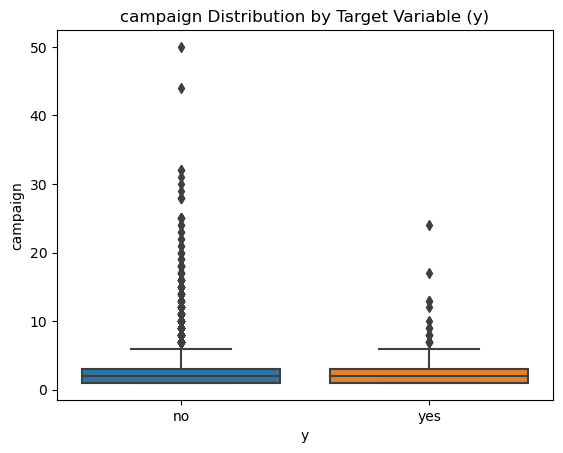

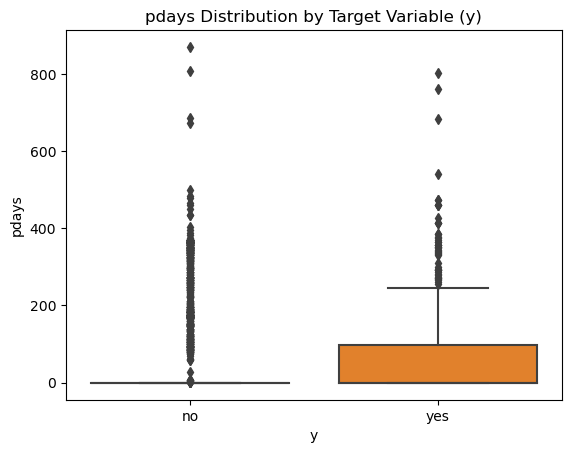

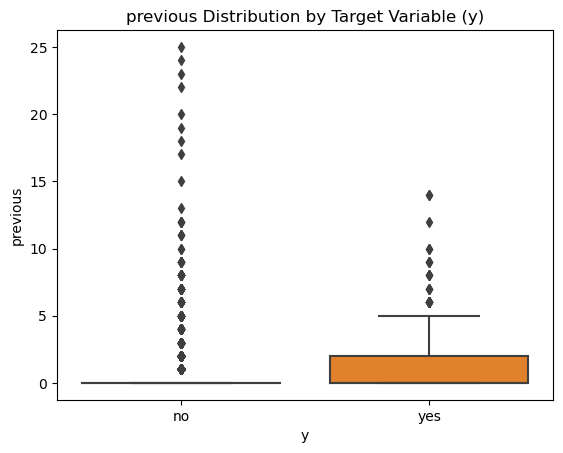

In [12]:
# Boxplot for Numerical Columns
for column in numerical_columns:
    sns.boxplot(x='y', y=column, data=df)
    plt.title(f'{column} Distribution by Target Variable (y)')
    plt.show()

In [13]:
# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [14]:
# Check for Correlation
correlation_matrix = df_encoded.corr()

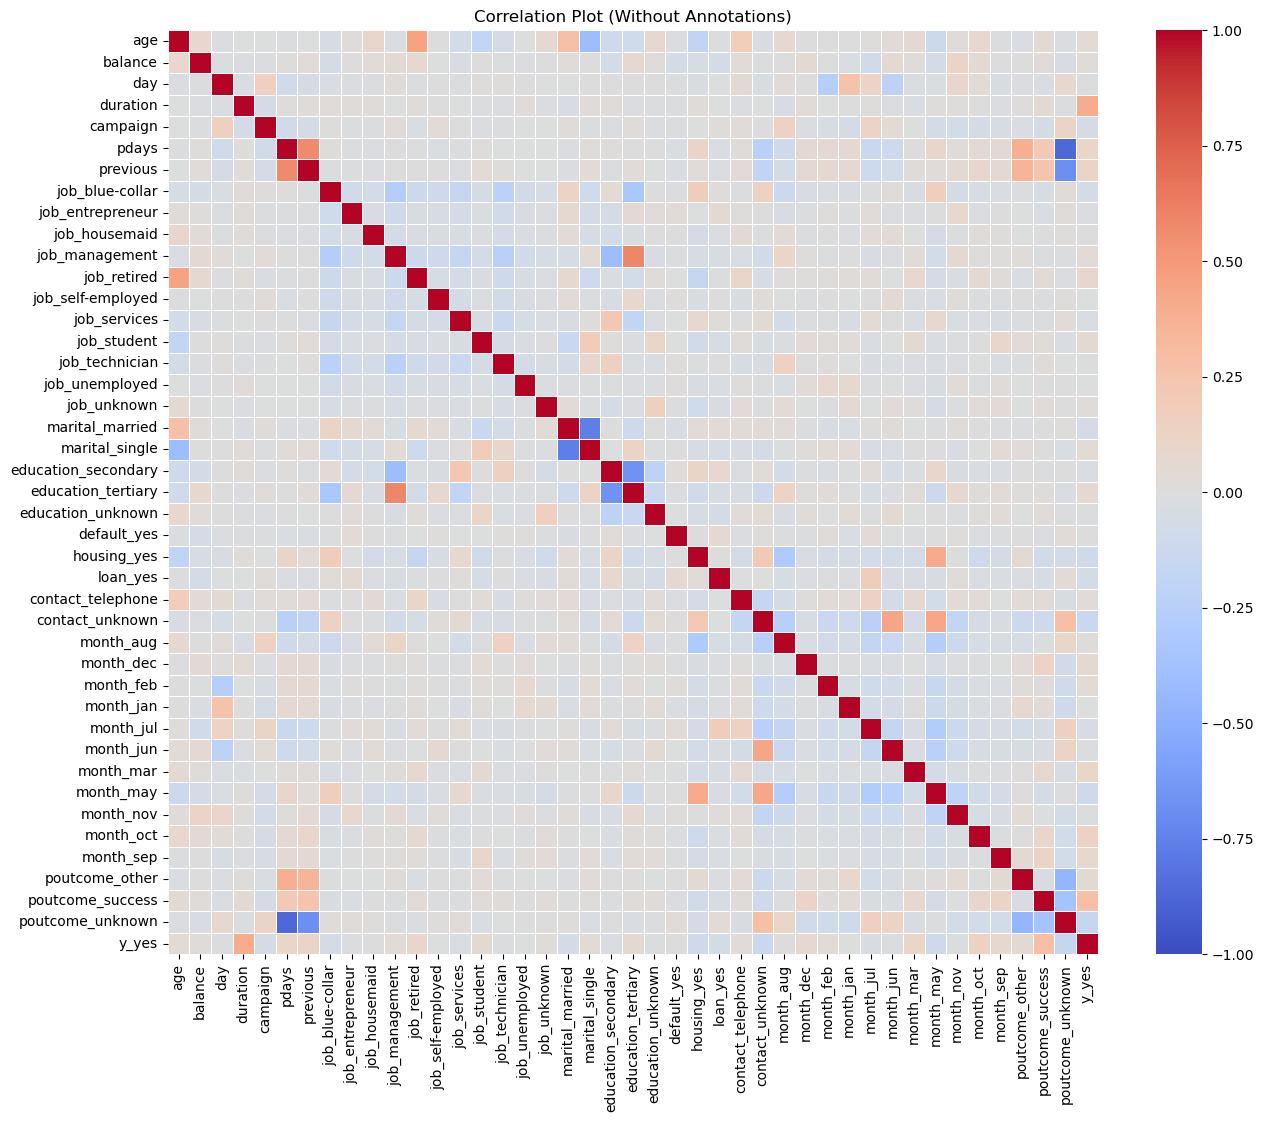

In [15]:
# Improve the readability of the correlation plot without annotations
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Plot (Without Annotations)')
plt.show()

In [16]:
# Check columns in df_encoded
print(df_encoded.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


In [17]:
# Decision Tree Classifier
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

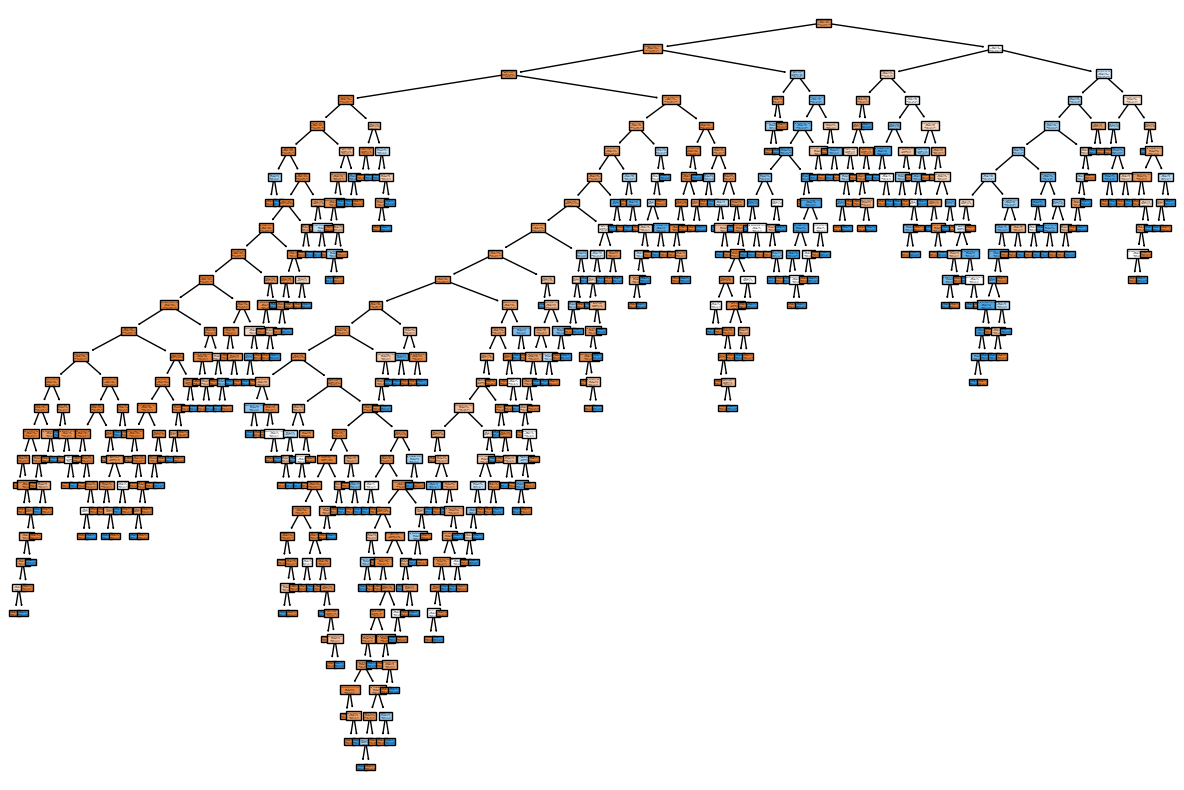

In [27]:
# Display Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns.tolist(), class_names=['no', 'yes'], filled=True)
plt.show()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8828729281767956
Confusion Matrix:
[[752  55]
 [ 51  47]]
